# Huang Transform
#### Gaussian peaks

## Set parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import modules.peaks as px
import modules.fouriertransform as ft
import modules.correlationfunctions as cf
import modules.gaussianfield as grf
import modules.filters as flt
# import nbodykit.lab as nbkt
import scipy.interpolate as interpolate
import scipy.signal as signal
import scipy.stats as stats

import tftb as tf
from pyhht import EMD
from pyhht.visualization import plot_imfs

from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
import modules.colorednoise as cn
import ica_test_Jonathan as ica

## Gaussian peaks without noise

In [19]:
logtwo_N = 11
size_field = 2**logtwo_N
correlated = False

noise = np.random.normal
aPeak = [1, 1, 1, 1, 1] # Amplitude of the peaks (irrelevant as ICA do not recover amplitudes)
xPeak = [-7, -4, 0, 4, 7] # Position of the peaks
wPeak = [0.5, 0.1, 1.2, 0.7, 0.4] # Width of the peaks
rv = np.linspace(-10, 10, size_field)

peaks = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) )
pks = peaks[0,:] + peaks[1,:] + peaks[2,:] + peaks[3,:] + peaks[4,:]
# pks = peaks[2,:]

sig = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) + 
                noise(size=rv.size).T )

sign = pks

decomposer = EMD(sign)
imfs = decomposer.decompose()

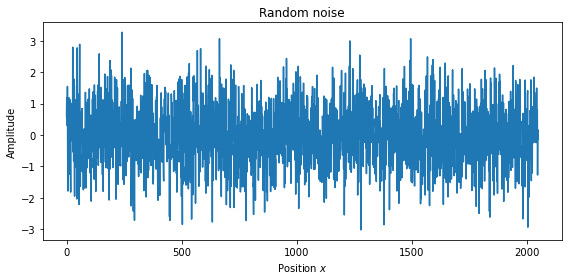

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

wn = noise(size=rv.size).T
ax.set_title("Random noise")
ax.plot(wn) #White noise
ax.set(xlabel=r'Position $x$', ylabel="Amplitude")
fig.tight_layout()

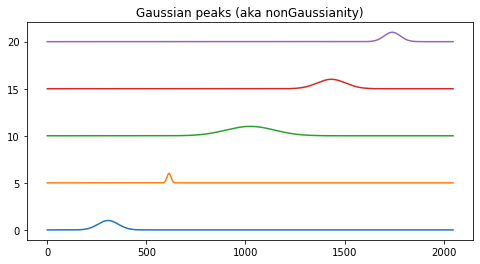

In [24]:
fig, a = plt.subplots(1,1,figsize=(8,4))

a.set_title("Gaussian peaks (aka nonGaussianity)")
for i in range(peaks.shape[0]):
    a.plot(peaks[i,:]+5.*i)

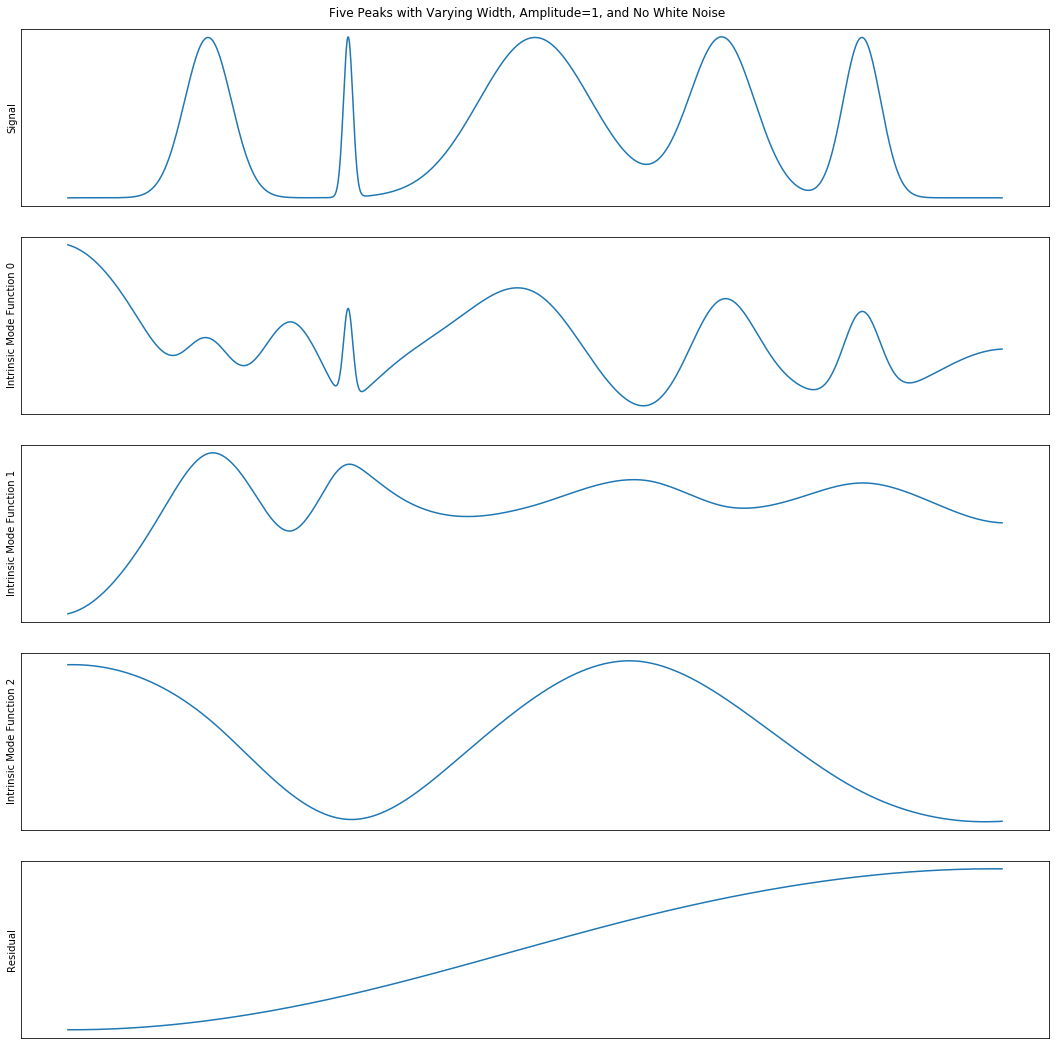

In [181]:
# plot_imfs(sign, imfs) 
count = 4

fig, axs = plt.subplots(count+1,1,figsize=(15,15))
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.suptitle('Five Peaks with Varying Width, Amplitude=1, and No White Noise')

# axs[0].plot(pks)
# axs[0].tick_params(
# axis='both',          # changes apply to the x-axis
# which='both',      # both major and minor ticks are affected
# bottom=False,      # ticks along the bottom edge are off
# top=False,         # ticks along the top edge are off
# left=False,
# right=False,
# labelbottom=False, # labels along the bottom edge are off
# labelleft=False)
# axs[0].set_ylabel('Source Peaks')

axs[0].plot(sign)
axs[0].tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right=False,
labelbottom=False, # labels along the bottom edge are off
labelleft=False)
axs[0].set_ylabel('Signal')

for j in range(count):
#     axs[j].set_title(r'ICA separated signals (num observed signals $=$ num source signals $-$ {0})'.format(j))
    axs[j+1].plot(imfs[j,:])
    axs[j+1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)
    
    if j==count-1:
        axs[j+1].set_ylabel('Residual')
    else:
        axs[j+1].set_ylabel('Intrinsic Mode Function {0}'.format(j))

## Gaussian peaks with noise

In [26]:
logtwo_N = 11
size_field = 2**logtwo_N
correlated = False

noise = np.random.normal
aPeak = [1, 1, 1, 1, 1] # Amplitude of the peaks (irrelevant as ICA do not recover amplitudes)
xPeak = [-7, -4, 0, 4, 7] # Position of the peaks
wPeak = [0.5, 0.1, 1.2, 0.7, 0.4] # Width of the peaks
rv = np.linspace(-10, 10, size_field)

peaks = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) )
pks = peaks[0,:] + peaks[1,:] + peaks[2,:] + peaks[3,:] + peaks[4,:]
# pks = peaks[2,:]

sig = np.vstack( [np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]),
                noise(size=rv.size).T] )

sg = sig[0,:] + sig[1,:] + sig[2,:] + sig[3,:] + sig[4,:] + sig[5,:]

# print(sg.shape)
sign = sg

decomposer = EMD(sign)
imfs = decomposer.decompose()

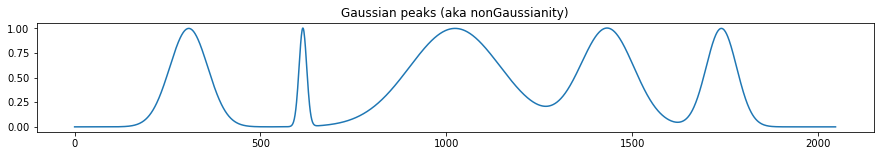

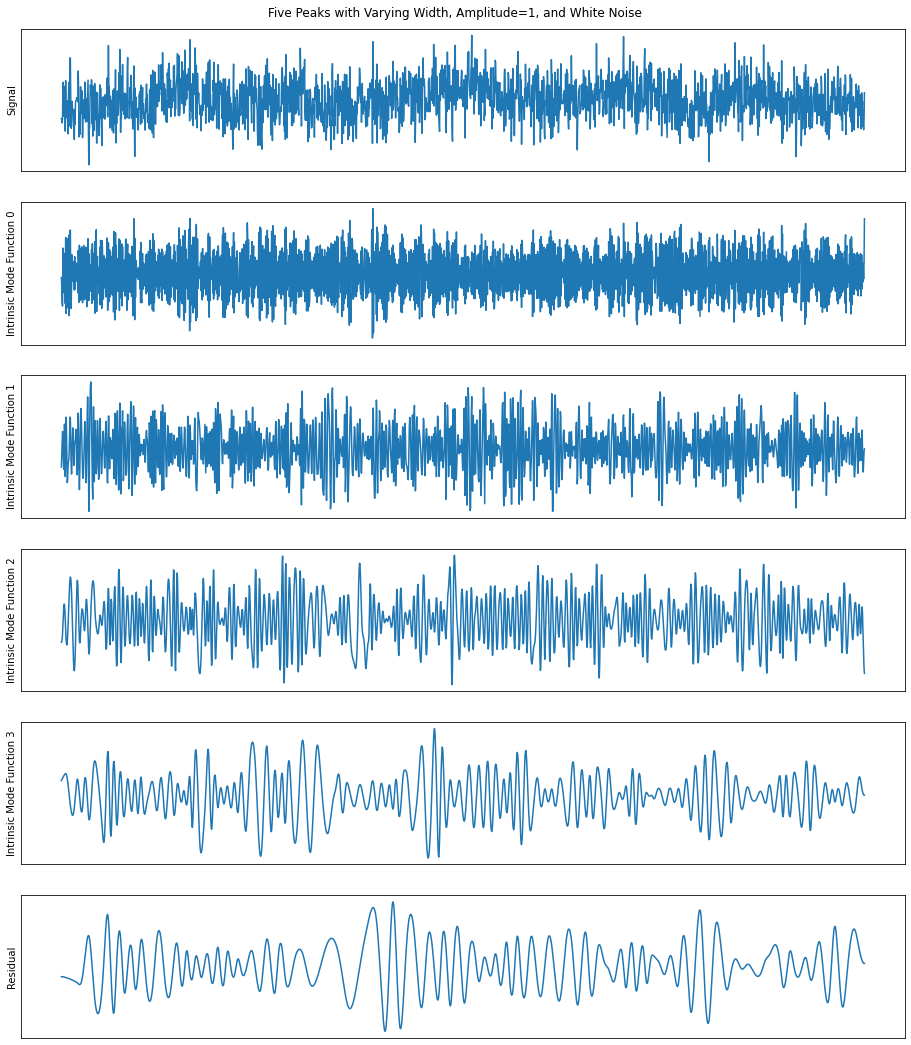

In [31]:
# plot_imfs(sign, imfs) 

fig, a = plt.subplots(1,1,figsize=(15,2))

a.set_title("Gaussian peaks (aka nonGaussianity)")
a.plot(pks)



count = 5

fig, axs = plt.subplots(count+1,1,figsize=(13,15))
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.suptitle('Five Peaks with Varying Width, Amplitude=1, and White Noise')

# axs[0].plot(pks)
# axs[0].tick_params(
# axis='both',          # changes apply to the x-axis
# which='both',      # both major and minor ticks are affected
# bottom=False,      # ticks along the bottom edge are off
# top=False,         # ticks along the top edge are off
# left=False,
# right=False,
# labelbottom=False, # labels along the bottom edge are off
# labelleft=False)
# axs[0].set_ylabel('Source Peaks')

axs[0].plot(sign)
axs[0].tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right=False,
labelbottom=False, # labels along the bottom edge are off
labelleft=False)
axs[0].set_ylabel('Signal')

for j in range(count):
#     axs[j].set_title(r'ICA separated signals (num observed signals $=$ num source signals $-$ {0})'.format(j))
    axs[j+1].plot(imfs[j,:])
    axs[j+1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)
    
    if j==count-1:
        axs[j+1].set_ylabel('Residual')
    else:
        axs[j+1].set_ylabel('Intrinsic Mode Function {0}'.format(j))

# ICA

In [2]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
import modules.colorednoise as cn
import ica_test_Jonathan as ica

## Setup and ICA for multiple signals + noise

(2048, 5)


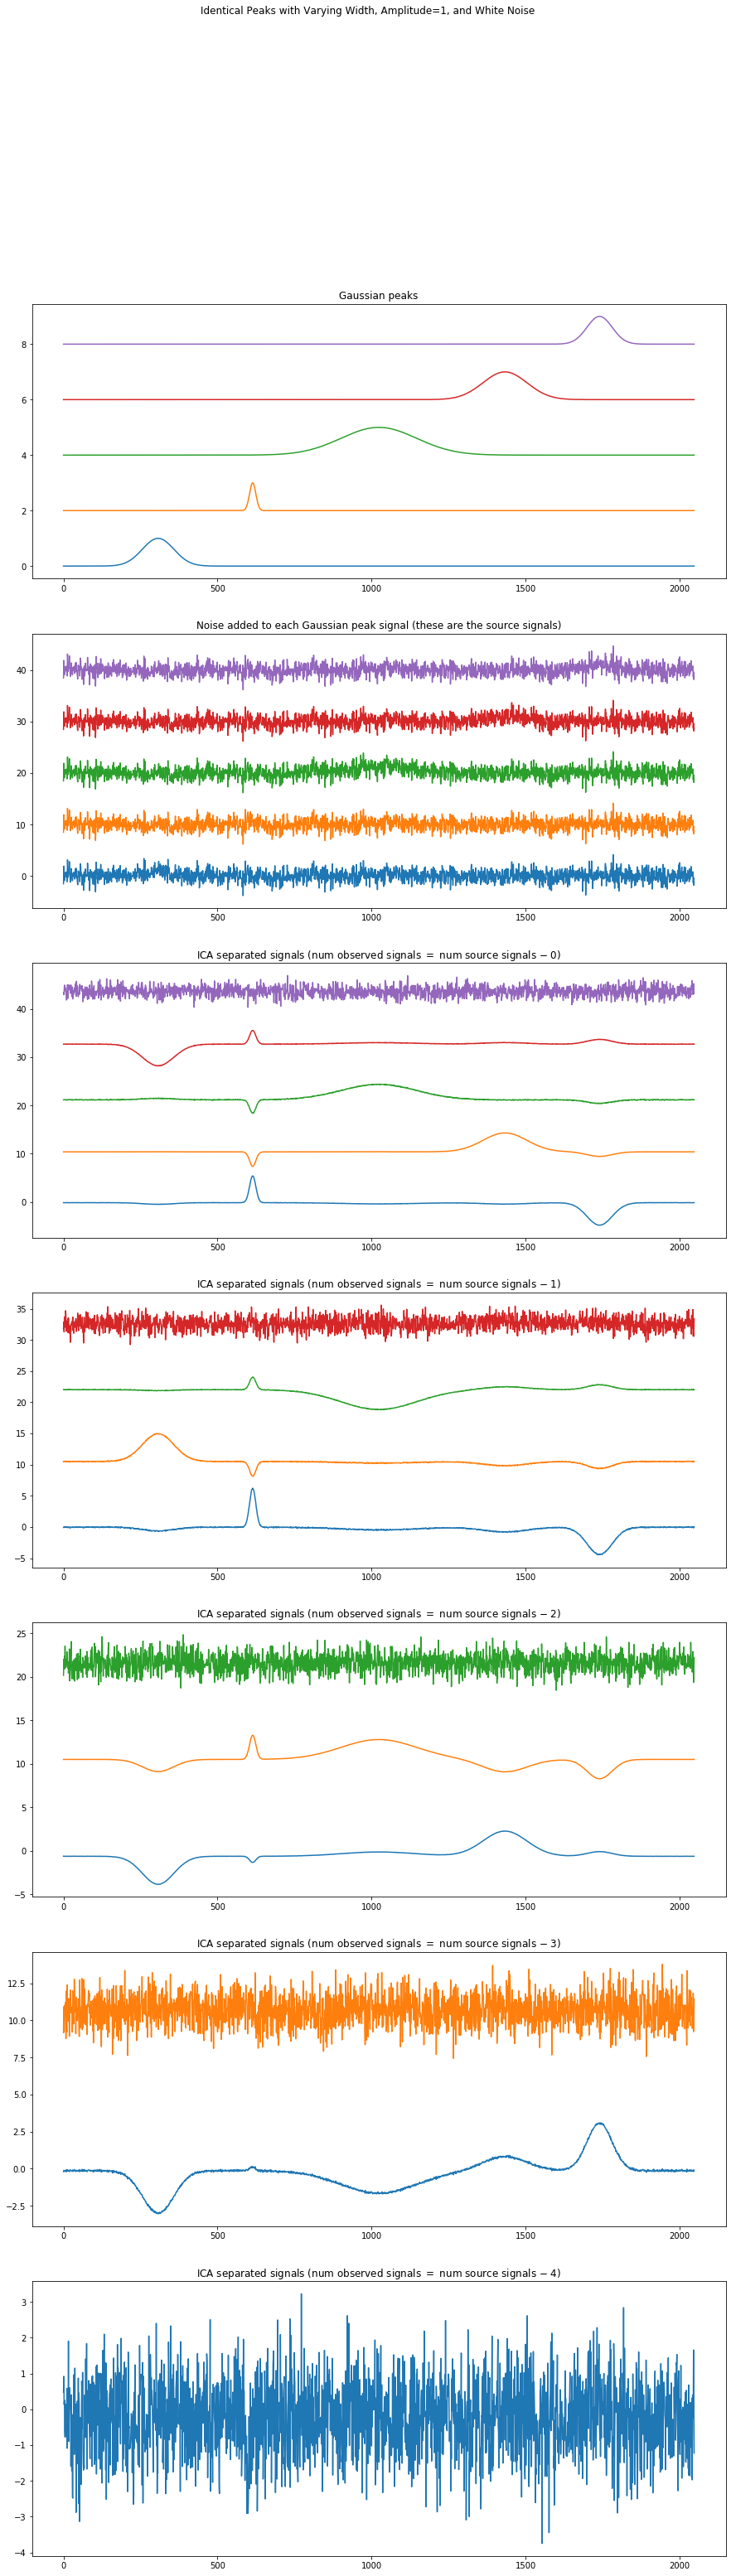

In [15]:
logtwo_N = 11
size_field = 2**logtwo_N
correlated = False

noise = np.random.normal
aPeak = [1, 1, 1, 1, 1] # Amplitude of the peaks (irrelevant as ICA do not recover amplitudes)
xPeak = [-7, -4, 0, 4, 7] # Position of the peaks
wPeak = [0.5, 0.1, 1.2, 0.7, 0.4] # Width of the peaks

peaks = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) ).T

fig, axs = plt.subplots(7,1,figsize=(15,50))
plt.suptitle('Identical Peaks with Varying Width, Amplitude=1, and White Noise')
axs[0].set_title("Gaussian peaks")
for i in range(peaks.shape[-1]):
    axs[0].plot(peaks[:,i]+2.*i)

sig = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) + 
                noise(size=rv.size).T ).T
axs[1].set_title("Noise added to each Gaussian peak signal (these are the source signals)")
for i in range(sig.shape[-1]):
    axs[1].plot(sig[:,i]+10.*i)
      
for j in range(5):
    num_comps = len(aPeak)
    num_samples = num_comps - j

    s, smix, sr = ica.extract_peaks_nn(num_samples=num_samples, num_comps=num_comps, noise=noise, aPeak=aPeak, xPeak=xPeak, wPeak=wPeak, ns=size_field)

    axs[2+j].set_title(r'ICA separated signals (num observed signals $=$ num source signals $-$ {0})'.format(j))
    for i in range(sr.shape[-1]):
        axs[2+j].plot(sr[:,i]+11.*i)
    
# logtwo_N = 11
# size_field = 2**logtwo_N
# correlated = False

# aPeak = [1, 1, 1, 1, 1] # Amplitude of the peaks (irrelevant as ICA do not recover amplitudes)
# xPeak = [-8, -4, 0, 4, 8] # Position of the peaks
# wPeak = [.5, .5, .5, .5, .5] # Width of the peaks

# rv = np.linspace(-10, 10, size_field)
# source_noise = np.random.normal(size=rv.size).T
# source_signals = np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)])

# source_components = np.vstack([source_noise, source_signals])
# num_comps = source_components.shape[0]
# num_samples = num_comps - 1

# mix_matrix = (1+np.random.random((num_samples, num_comps)))/2.0
# mix_signal_pre = np.dot(mix_matrix, source_components)


## Plot the peaks

In [3]:
# peaks = np.vstack( np.array([ac*np.exp(-0.5*(rv-xc)**2/wc**2) for ac,xc,wc in zip(aPeak,xPeak,wPeak)]) ).T

# fig, a = plt.subplots()
# fig.set_size_inches(15, 15)
# a.set_title("Gaussian peaks")
# for i in range(peaks.shape[-1]):
#     a.plot(peaks[:,i]+2.*i)

## Plot the sources

In [4]:
# fig, a = plt.subplots()
# fig.set_size_inches(15, 15)
# a.set_title("Noise added to each Gaussian peak signal (these are the source signals)")
# for i in range(s.shape[-1]):
#     a.plot(s[:,i]+9.*i)

## Plot the inputs

In [5]:
# fig, a = plt.subplots()
# fig.set_size_inches(15, 15)
# a.set_title("Source signals randomly mixed together to make observed signals")
# for i in range(smix.shape[0]):
#     a.plot(smix[i,:]+25.*i)

## Plot extracted signals

In [6]:
# fig, a = plt.subplots()
# fig.set_size_inches(15, 10)
# a.set_title("ICA Separated Signals (Num observed signals = num source signals)")
# for i in range(sr.shape[-1]):
#     a.plot(sr[:,i]+10.*i)